<a href="https://colab.research.google.com/github/mrzhuzhe/pepper/blob/master/colabNote/ImageCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metric Learning

## Refferences

1. 


In [28]:
import numpy as np 
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
import re

In [24]:
!unzip -d ./ring /content/drive/MyDrive/Ring/P0-v1.zip

Archive:  /content/drive/MyDrive/Ring/P0-v1.zip
  inflating: ./ring/__MACOSX/._P0    
  inflating: ./ring/P0/.DS_Store     
  inflating: ./ring/__MACOSX/P0/._.DS_Store  
replace ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201658-1563059106330.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201658-1563059106330.JPG  
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201651-1562996230782.JPG  
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201651-1562988436681.JPG  
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201653-1563006812511.JPG  
  inflating: ./ring/P0/61/classes.txt  
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201657-1563051367263.JPG  
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-20211110201654-1563022209576.jpg  
  inflating: ./ring/P0/61/Camera MV-SUA33GM#0002-0013-Snapshot-2021111

In [6]:
TRAIN_DIR = './ring'

In [43]:
_filelist = []
for _dir in os.listdir(TRAIN_DIR):
  if re.search("^P\d+", _dir):
    for _fold in os.listdir(os.path.join(TRAIN_DIR, _dir)):
        if re.search("^\d+", _fold):
          for _file in os.listdir(os.path.join(TRAIN_DIR, _dir, _fold)):
            if re.search(".txt", _file) and not re.search("classes.txt", _file) :
              _filepath = os.path.join(TRAIN_DIR, _dir, _fold, _file)
              #print(_filepath)
              _filelist.append(_filepath)

In [48]:
_imgfilelist = []
for i in _filelist:
  _imgfilelist.append(i.replace(".txt", '.JPG'))

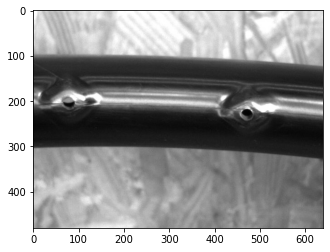

In [49]:
# resize Image to same width
image = cv2.imread(_imgfilelist[0])
plt.imshow(image)

In [58]:
image.shape

(480, 640, 3)

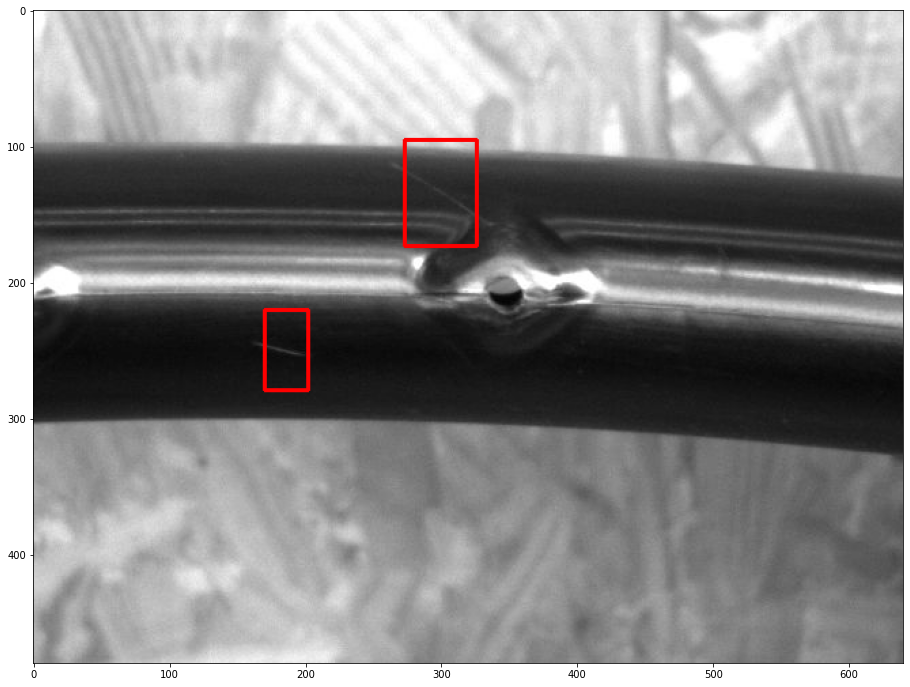

In [102]:
num_list = []
w = 640
h = 480
idx = 2
color = (255, 0, 0)
thickness = 2

# className center-x center-y width height
for i in _filelist[idx:idx+1]:
  with open(i, "r") as fh:
      _imgpath = i.replace(".txt", '.JPG')
      image = cv2.imread(_imgpath)
      for line in fh:
          res = re.match("\d (0.\d+) (0.\d+) (0.\d+) (0.\d+)", line)
          if res:
            _h = float(res[3]) * w
            _w = float(res[4]) * h
            _x = float(res[1]) * w - _w/2 
            _y = float(res[2]) * h - _h/2
            _start_point = (int(_x), int(_y))
            _end_point = (int(_x + _w), int(_y + _h))
            image = cv2.rectangle(image, _start_point, _end_point, color, thickness)
            # crop this rectangle down
  plt.figure(figsize=(16, 12))
  plt.imshow(image)

In [67]:
len(num_list)

780